#### Import libraries (Numpy, pandas, matplotlib, plotly and seaborn) and then read csv file. 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

data = pd.read_csv("C:\\Users\\Subhaan khokhar\\Downloads\\EDA Internship 2.0 Week 4\\menu.csv")

selected_attributes = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 
                       'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                       'Calcium (% Daily Value)', 'Iron (% Daily Value)']

df = data[selected_attributes]

print(df)


     Calories  Total Fat  Carbohydrates  Dietary Fiber  Sugars  Protein  \
0         300       13.0             31              4       3       17   
1         250        8.0             30              4       3       18   
2         370       23.0             29              4       2       14   
3         450       28.0             30              4       2       21   
4         400       23.0             30              4       2       21   
..        ...        ...            ...            ...     ...      ...   
255       510       17.0             80              1      64       12   
256       690       23.0            106              1      85       15   
257       340       11.0             53              1      43        8   
258       810       32.0            114              2     103       21   
259       410       16.0             57              1      51       10   

     Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
0                           10        

#### : Check statistical facts by checking all columns. Then calculate the maximum value of the following attributes.

In [2]:
stats = df.describe()
print("Statistical facts for all columns:")
print(stats)

maximum = df.max()

attributes = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 
                         'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                         'Calcium (% Daily Value)', 'Iron (% Daily Value)']

max_attributes = maximum[attributes]

print("\nMaximum values for specified attributes:")
print(max_attributes)


Statistical facts for all columns:
          Calories   Total Fat  Carbohydrates  Dietary Fiber      Sugars  \
count   260.000000  260.000000     260.000000     260.000000  260.000000   
mean    368.269231   14.165385      47.346154       1.630769   29.423077   
std     240.269886   14.205998      28.252232       1.567717   28.679797   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%     210.000000    2.375000      30.000000       0.000000    5.750000   
50%     340.000000   11.000000      44.000000       1.000000   17.500000   
75%     500.000000   22.250000      60.000000       3.000000   48.000000   
max    1880.000000  118.000000     141.000000       7.000000  128.000000   

          Protein  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
count  260.000000                 260.000000                 260.000000   
mean    13.338462                  13.426923                   8.534615   
std     11.426146                  24.366381           

#### : Check to see if infact there is any correlation between Calories and other independent variables by plotting a correlation matrix next.
 

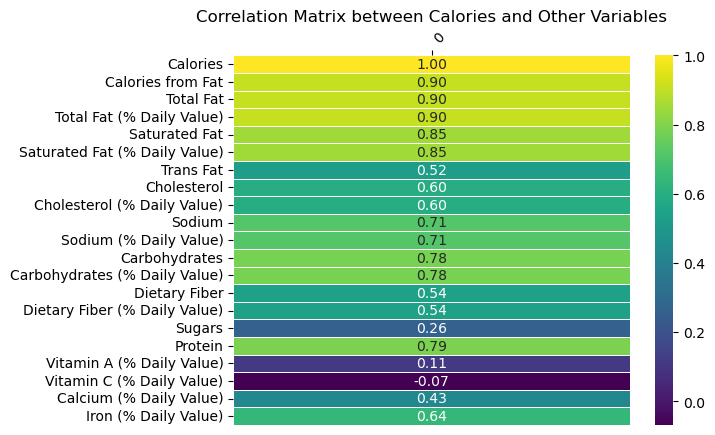

In [51]:
correlation_matrix= data.drop(["Category", "Item", "Serving Size"], axis=1).corrwith(data["Calories"])

heatmap = sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

heatmap.xaxis.tick_top()

plt.xticks(rotation=45, ha='left')

plt.title('Correlation Matrix between Calories and Other Variables')
plt.show()




#### Draw boxplot for Calories vs Category to spot outliers and max calories category

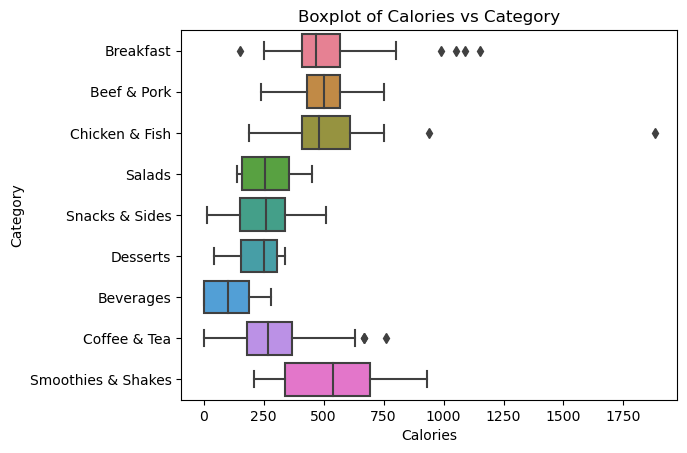

In [35]:
sns.boxplot(x='Calories', y='Category', data=data, palette='husl')
plt.title('Boxplot of Calories vs Category')
plt.show()


####  Figure out which exact item contains a high quantity for ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)'.

In [37]:
attributes = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein',
              'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

max_items = {}

for attribute in attributes:
    max_index = data[attribute].idxmax()
    max_item = data.loc[max_index, 'Item']
    max_items[attribute] = {'Item': max_item, 'Value': data.loc[max_index, attribute]}

for attribute, details in max_items.items():
    print(f"{attribute}: {details['Item']} - {details['Value']}")


Calories: Chicken McNuggets (40 piece) - 1880
Total Fat: Chicken McNuggets (40 piece) - 118.0
Carbohydrates: Chocolate Shake (Large) - 141
Dietary Fiber: Big Breakfast with Hotcakes (Large Biscuit) - 7
Sugars: McFlurry with M&M’s Candies (Medium) - 128
Protein: Chicken McNuggets (40 piece) - 87
Vitamin A (% Daily Value): Premium Bacon Ranch Salad (without Chicken) - 170
Vitamin C (% Daily Value): Minute Maid Orange Juice (Large) - 240
Calcium (% Daily Value): Strawberry Shake (Large) - 70
Iron (% Daily Value): Big Breakfast with Hotcakes (Regular Biscuit) - 40


#### : Draw Stripplot for each category against the following attributes ['Calories', 'Total Fat','Carbohydrates', 'DietaryFiber', 'Sugars','Protein','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)', 'Iron(% Daily Value)'.

C:\Users\Subhaan khokhar\AppData\Local\Temp\ipykernel_1500\82901999.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Category', y=attribute, data=data, ax=axes[i], jitter=True, palette=category_palette)
C:\Users\Subhaan khokhar\AppData\Local\Temp\ipykernel_1500\82901999.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Subhaan khokhar\AppData\Local\Temp\ipykernel_1500\82901999.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Category', y=attribute, data=data, ax=axes[i], jitter=True, palette=category_palette)
C:\Users\Subhaan khokhar\AppData\Local\Temp\ipykernel_1500\82901999.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Subhaan khokhar\AppData\Local\T

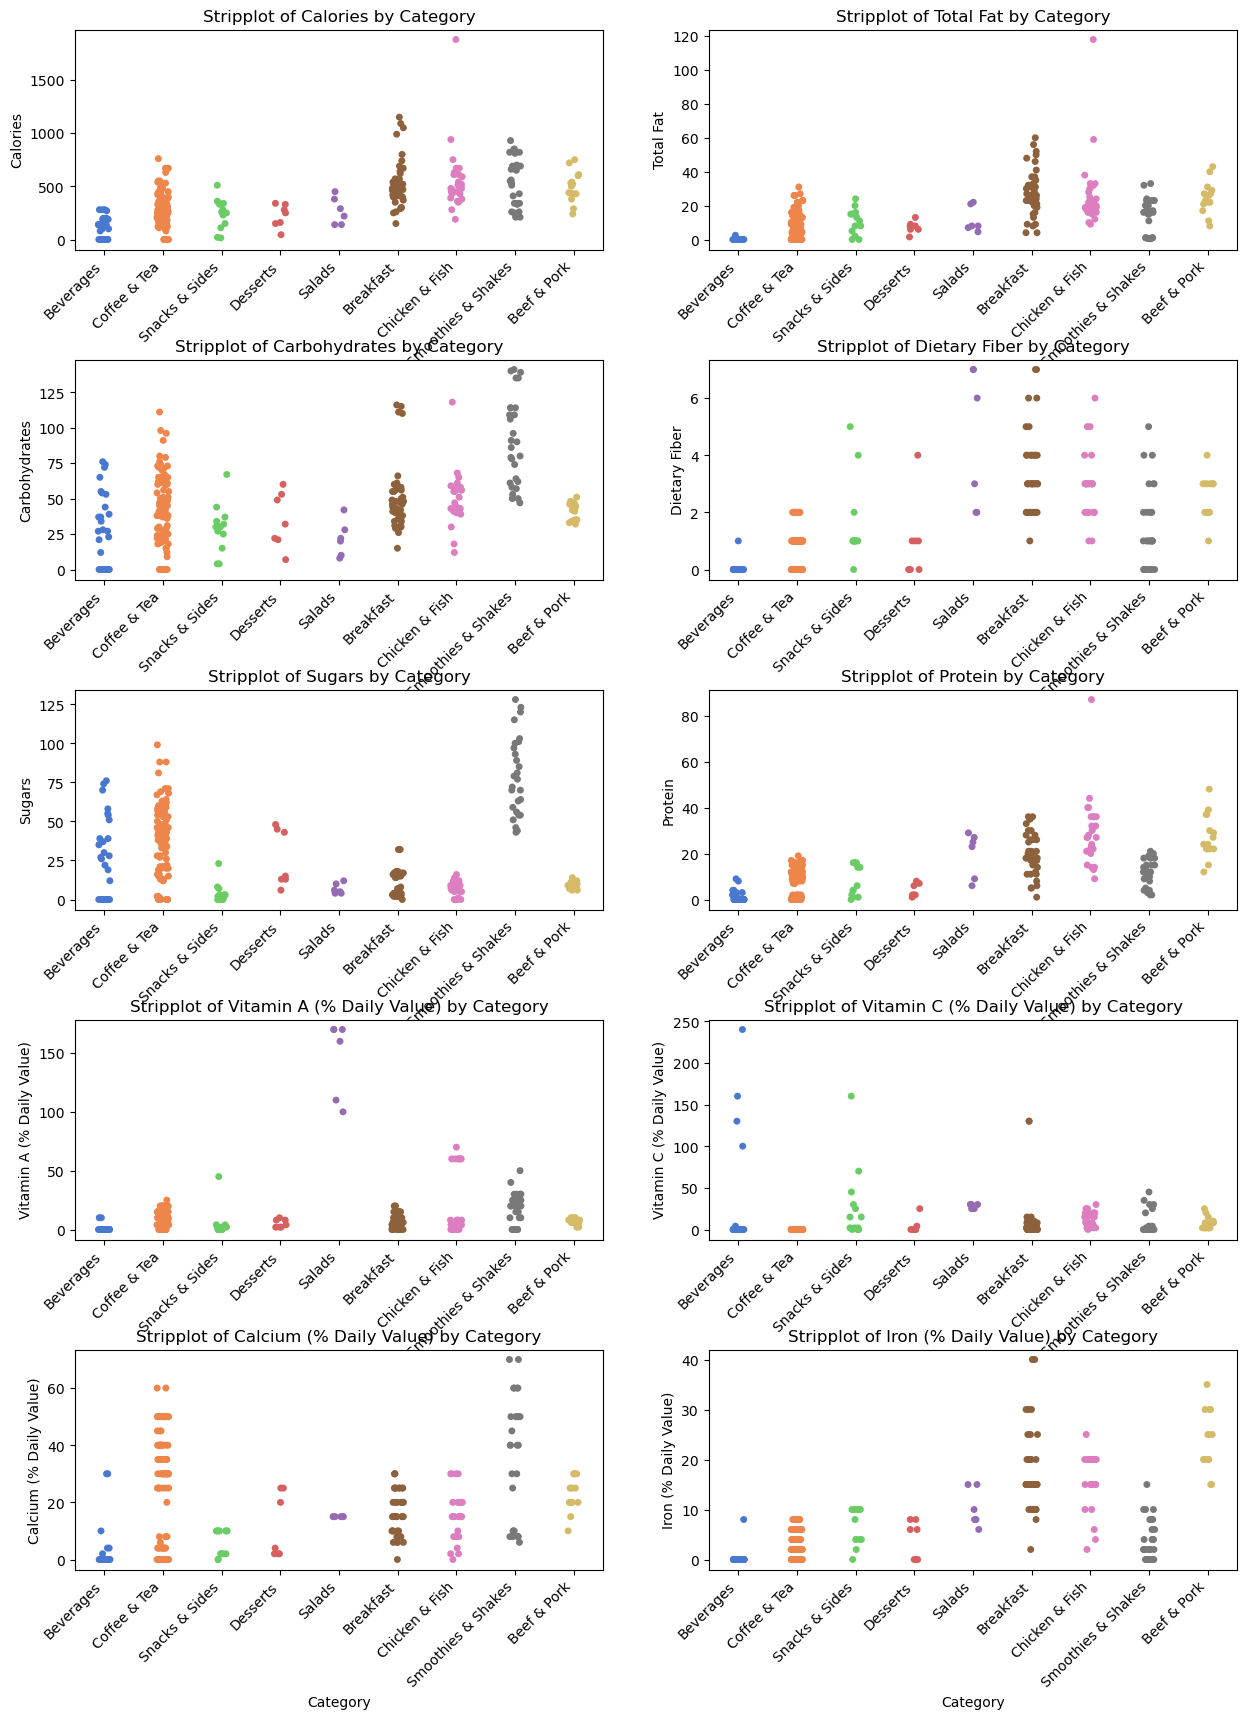

In [54]:
attributes = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein',
              'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)


axes = axes.flatten()

category_palette = sns.color_palette('muted', n_colors=len(data['Category'].unique()))


for i, attribute in enumerate(attributes):
    sns.stripplot(x='Category', y=attribute, data=data, ax=axes[i], jitter=True, palette=category_palette)
    axes[i].set_title(f'Stripplot of {attribute} by Category')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
plt.show()

#### Draw a horizontal bar graph for items in each category against the calories.
 

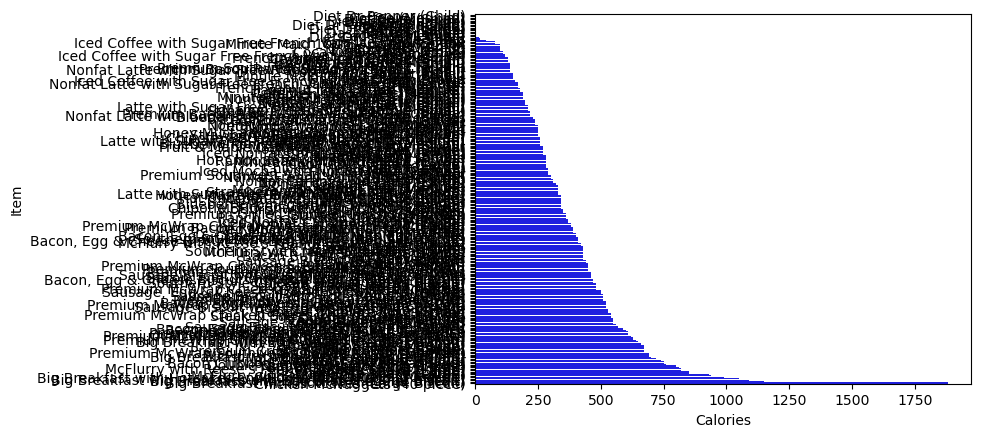

In [57]:
data = data.sort_values(by='Calories', ascending=True)

sns.barplot(x='Calories', y='Item', data=data, color='blue')

plt.xlabel('Calories')
plt.ylabel('Item')
plt.show()


